In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Functions

In [9]:
import os
import pickle

import numpy as np


def read_data(data_dir='./cifar-10-batches-py'):
    with open(os.path.join(data_dir, 'test_batch'), 'rb') as fo:
        data_elem = pickle.load(fo, encoding='latin1')
        test_data = data_elem['data']
        test_labels = data_elem['labels']
    with open(os.path.join(data_dir, 'batches.meta'), 'rb') as fo:
        batches_meta = pickle.load(fo, encoding='latin1')
    return test_data, test_labels, batches_meta


def evaluate(test_data, test_labels, ckpt_path='./model_ckpts/'):
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph(tf.train.latest_checkpoint(ckpt_path) + '.meta', clear_devices=True)
        saver.restore(sess, tf.train.latest_checkpoint(ckpt_path))
        graph = tf.get_default_graph()
        x = graph.get_tensor_by_name('x:0')
        y = graph.get_tensor_by_name('y:0')
        keep_prob = graph.get_tensor_by_name('keep_prob:0')
        accuracy = graph.get_tensor_by_name('accuracy:0')
        y_hat = graph.get_tensor_by_name('y_hat:0')

        preds, accuracy = (
            sess.run([y_hat, accuracy],
                     feed_dict={x: test_data, y: np.array(test_labels).reshape(-1, 1), keep_prob: 1.}))

        return preds, accuracy


## Read test data

In [10]:
test_data, test_labels, batches_meta = read_data()

In [11]:
label_names = batches_meta['label_names']

In [21]:
preds, accuracy = evaluate(test_data, test_labels)

INFO:tensorflow:Restoring parameters from ./model_ckpts/model.ckpt-3890


In [22]:
print('Test accuracy: ', accuracy)

Test accuracy:  0.6949


## Predict & visualize

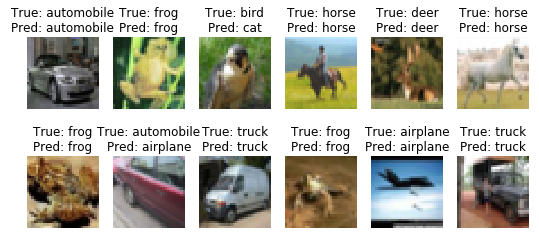

In [23]:
pics_shape = (2, 6)
plt.figure(figsize=(1.5 * pics_shape[1] , 2 * pics_shape[0]))
indices = np.random.choice(range(len(test_labels)), size=np.prod(pics_shape), replace=False)
i = 0
for idx in indices:
    i += 1
    plt.subplot(*pics_shape, i)
    plt.title('True: {}\nPred: {}'.format(label_names[test_labels[idx]], label_names[preds[idx][0]]))
        
    plt.imshow(test_data[idx].reshape((3, 32, 32)).transpose((1, 2, 0)))
    plt.axis('off')
plt.show()